<a href="https://colab.research.google.com/github/Lee-HT/EDA/blob/main/online_food_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Datasets

Data URL https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset/data

In [3]:
import pandas as pd

In [4]:
root = "/content/"

data = pd.read_csv(root + "onlinefoods.csv")

print(data.head(3))

print("\nUnnamed Check : ", data[data["Unnamed: 12"] != data["Output"]].size)

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  

Unnamed Check :  0


"Output" 열과 동일한 값을 가진 "Unnamed: 12" 열 삭제

In [5]:
columns = data.columns
remove_cols = ["Unnamed: 12"]

def remove_columns():
  exists = []
  for col in remove_cols:
    if col in columns:
      exists.append(col)

  data.drop(exists,axis=1, inplace=True)

remove_columns()
data.rename(columns={"Marital Status":"Marital","Monthly Income":"Income","Educational Qualifications":"Education","Pin code":"code"}, inplace=True)

print(data.columns)

Index(['Age', 'Gender', 'Marital', 'Occupation', 'Income', 'Education',
       'Family size', 'latitude', 'longitude', 'code', 'Output', 'Feedback'],
      dtype='object')


# EDA

In [6]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from scipy.stats.contingency import association
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

수치형 자료 통계 확인

In [7]:
data.describe()

,Age,Family size,latitude,longitude,code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


데이터 시각화

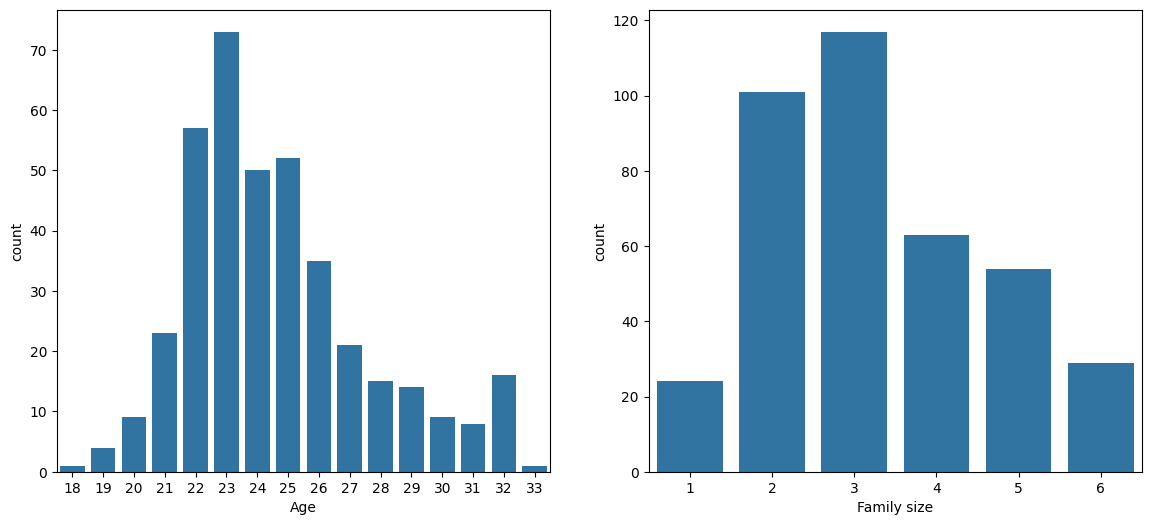

In [8]:
fig, ax = plt.subplots(ncols=2,figsize=(14,6))
sns.countplot(x=data["Age"],ax=ax[0])
sns.countplot(x=data["Family size"],ax=ax[1])

plt.show()

10000 루피 이하의 경우 부정적인 피드백의 비율이 높음

Income
No Income          170
More than 50000     50
25001 to 50000      48
10001 to 25000      35
Below Rs.10000      14
Name: count, dtype: int64


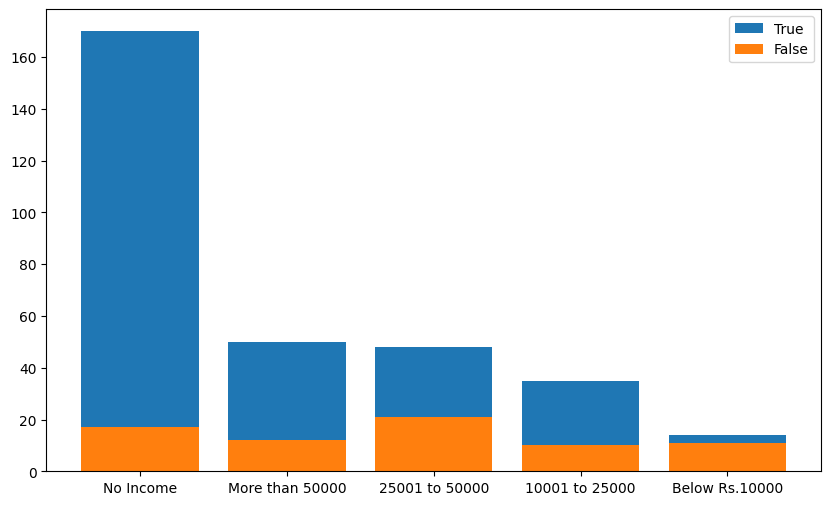

In [9]:
column_name = "Income"
true_data = data[data["Feedback"]=="Positive"][column_name].value_counts()
false_data = data[data["Feedback"]=="Negative "][column_name].value_counts()
print(true_data)

plt.figure(figsize=(10,6))
plt.bar(true_data.index,true_data)
plt.bar(false_data.index,false_data)
plt.legend(labels=["True","False"])
plt.show()

범주형 변수 인코딩

In [10]:
encoder = LabelEncoder()

for c in ["Gender","Marital","Occupation","Education"]:
  data[[c]] = data[[c]].apply(encoder.fit_transform)
  print(encoder.classes_)

data["Feedback"] = data["Feedback"].apply(lambda x:1 if x == "Positive" else 0)
data["Output"] = data["Output"].apply(lambda x:1 if x == "Yes" else 0)
print("\n",data.head(5))

['Female' 'Male']
['Married' 'Prefer not to say' 'Single']
['Employee' 'House wife' 'Self Employeed' 'Student']
['Graduate' 'Ph.D' 'Post Graduate' 'School' 'Uneducated']

    Age  Gender  Marital  Occupation          Income  Education  Family size  \
0   20       0        2           3       No Income          2            4   
1   24       0        2           3  Below Rs.10000          0            3   
2   22       1        2           3  Below Rs.10000          2            3   
3   22       0        2           3       No Income          0            6   
4   22       1        2           3  Below Rs.10000          2            4   

   latitude  longitude    code  Output  Feedback  
0   12.9766    77.5993  560001       1         1  
1   12.9770    77.5773  560009       1         1  
2   12.9551    77.6593  560017       1         0  
3   12.9473    77.5616  560019       1         1  
4   12.9850    77.5533  560010       1         1  


In [11]:
print(data["Income"].value_counts(),"\n")

encode = {'No Income':0, 'Below Rs.10000':10000 ,'More than 50000':50000, '10001 to 25000':17500,'25001 to 50000':37500}
data["Income"] = data["Income"].apply(lambda x:encode[x])
print(data["Income"])

Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64 

0          0
1      10000
2      10000
3          0
4      10000
       ...  
383        0
384        0
385        0
386    10000
387        0
Name: Income, Length: 388, dtype: int64


수입, 위치 정보, 위치 코드 정규화

In [12]:
scaler = MinMaxScaler()

data[["Income","latitude","longitude","code"]] = scaler.fit_transform(data[["Income","latitude","longitude","code"]])

data[["Income","latitude","longitude","code"]].describe()

,Income,latitude,longitude,code
count,388.000000,388.000000,388.000000,388.000000
mean,0.346649,0.451258,0.423210,0.362161
std,0.396042,0.187877,0.187423,0.290737
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.302787,0.295894,0.090278
50%,0.200000,0.472128,0.393796,0.300926
75%,0.750000,0.556693,0.535401,0.620370
max,1.000000,1.000000,1.000000,1.000000


**상관분석**

스피어만 상관계수

<Axes: >

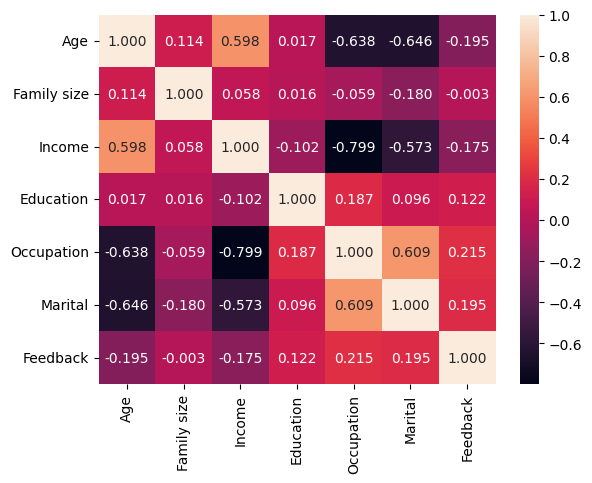

In [13]:
corr = data[["Age","Family size","Income","Education","Occupation","Marital","Feedback"]].corr(method="spearman")
sns.heatmap(corr,annot=True,fmt=".3f")

크래머 V

<Axes: >

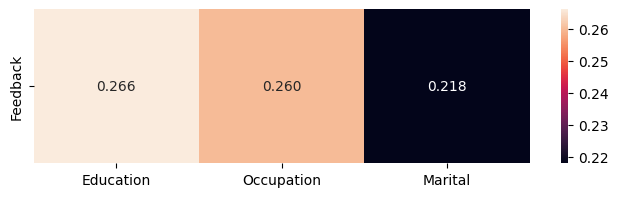

In [14]:
results = {}
for d in ["Education","Occupation","Marital"]:
  assoc = data[[d,"Feedback"]].apply(lambda x:x+1)
  results[d]=([association(assoc,method="cramer")])

corr = pd.DataFrame.from_dict(data = results,orient="columns")
corr.rename(index={0:"Feedback"},inplace=True)
plt.figure(figsize=(8,2))
sns.heatmap(corr,annot=True,fmt=".3f")

<Axes: xlabel='Income', ylabel='count'>

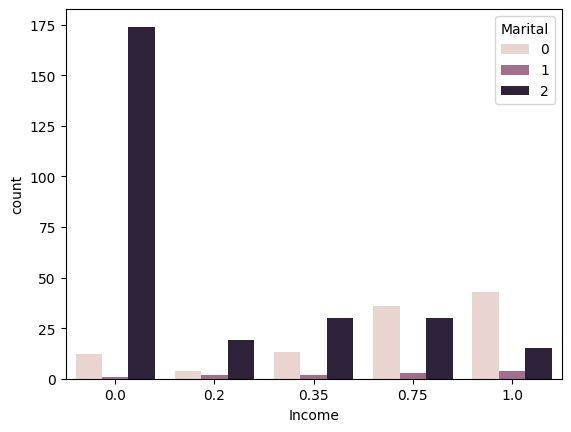

In [15]:
data["Income"] = data["Income"].apply(lambda x:math.floor(x*100)/100)
sns.countplot(data=data,x="Income",hue="Marital")

**카이제곱 독립성 검정**

H0 수입과 결혼 여부는 독립적이다

H1 수입과 결혼 여부는 독립이 아니다

In [16]:
table = pd.crosstab(data["Marital"],data["Income"])
res = stats.chi2_contingency(table)

print("Statistic : ",res.statistic)
print("P-value : ",res.pvalue)
print("Dof : ",res.dof)
print("Expected_freq : ",res.expected_freq)

Statistic :  134.35502818835724
P-value :  3.533714876244933e-25
Dof :  8
Expected_freq :  [[ 52.05154639   6.95876289  12.5257732   19.20618557  17.25773196]
 [  5.78350515   0.77319588   1.39175258   2.13402062   1.91752577]
 [129.16494845  17.26804124  31.08247423  47.65979381  42.82474227]]
